In [1]:
#Import libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
from scipy import stats
import math
import os
import random
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures

# 5.3 Polynomial Regression - solution

## 5.3.1 Create dataset

We create adataset that has a sinoid form, i.e. something that would be hard to predict using a simple linear regression

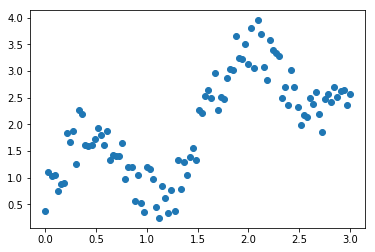

In [2]:
#this creates the toy data for the rest of the excercise
x = np.linspace(0, 3, 100) 
rng = np.random.RandomState(42)
y = np.sin(4 * x) + x + rng.uniform(size=len(x))

plt.plot(x, y, 'o');

Just for fun we are going to look what happens if we try to predict this dataset using a simple linear regression

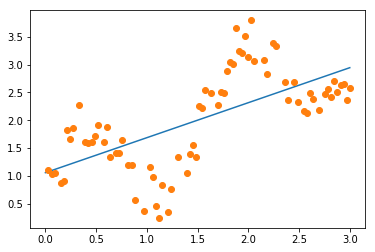

In [3]:
X = x[:, np.newaxis]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

min_pt = X.min() * regressor.coef_[0] + regressor.intercept_
max_pt = X.max() * regressor.coef_[0] + regressor.intercept_

plt.plot([X.min(), X.max()], [min_pt, max_pt])
plt.plot(X_train, y_train, 'o');

As you can see, fitting a straight line through the data is not the best model we can have. Our linear model has a **high bias**. This means that our model has a high bias towards the functional fit of the data, in this case a linear fit.

## 5.3.2 Do some polynomial feature extraction

One of the easiest ways to make your machine learning technique more *intelligent* is to extract relevant features from the data. These features can be anything that you can find that will make it easier for the method to be able to fit the data. This means that as a machine learning engineer it is best to know and understand your data.

As some of you might remember from math class is that you can create an approximation of any function (including a sine function) using a polynomial function with the [Taylor expansion](https://en.wikipedia.org/wiki/Taylor_series). So we will use that approach to learn a better fit.

In this case we will create what we call features using a [polynomial expansion](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html). If you set the degree to 3 it will generate data of the 0d, 1st, 2nd and 3rd order (including cross products) as shown in the example below (change x and degree to see the different expansions of x to a certain degree).

In [4]:
x = [[2]]
pol_exp = PolynomialFeatures(degree=4)
pol_exp.fit_transform(x)

array([[ 1.,  2.,  4.,  8., 16.]])

As you can see above this function transforms $x$ into 

[$x^0$, $x^1$, $x^2$, $x^3$, $x^4$] with $x^0=1$ and $x^1 = x$. 

If you have 2 inputs it will also take the cross products so that [$x_1$, $x_2$] is transformed into: 

[$1=x_1^0=x_2^2$, $x_1$, $x_2$, $x_1^2$, $x_1x_2$, $x_2^2$, $x_1^3$, $x_1^2x_2$, $x_1x_2^2$, $x_2^3$] 

as shown below.

In [5]:
x = [[2, 3]]
pol_exp = PolynomialFeatures(degree=3)
pol_exp.fit_transform(x)

array([[ 1.,  2.,  3.,  4.,  6.,  9.,  8., 12., 18., 27.]])

In this example we only have 1 input so the number of features is always the `degree + 1`.

Because of this polynomial features extraction finding of the coefficients of the polynomial becomes a linear problem, so similar to the previous exercise on multiple linear regression you can find the optimal weights as follows:

$$y = c_0 + c_1 x + c_2 x^2 + c_3 x^3 + \cdots + c_n x^n$$

So for multiple values of $x$ and $y$ you can minimize the error of this equation using linear regression. How this is done in practice is shown below.

Note that we do not actually use another type of model, we have just extended our features/independent variables/x's.


When we have more than one predictor loaded in the polynomial transformer, we also get the crossproducts between these predictors. These are the interaction terms as discussed in notebook on advanced regression!

## 5.3.3 Fit the polynomial model

In [6]:
X_train

array([[0.45454545],
       [1.21212121],
       [2.90909091],
       [0.27272727],
       [2.18181818],
       [0.33333333],
       [1.42424242],
       [2.57575758],
       [0.84848485],
       [2.81818182],
       [0.15151515],
       [2.        ],
       [1.96969697],
       [1.06060606],
       [0.48484848],
       [1.48484848],
       [1.03030303],
       [0.21212121],
       [2.87878788],
       [0.81818182],
       [0.57575758],
       [2.45454545],
       [0.75757576],
       [1.87878788],
       [0.39393939],
       [0.72727273],
       [0.09090909],
       [0.51515152],
       [1.15151515],
       [0.24242424],
       [2.36363636],
       [0.18181818],
       [1.93939394],
       [1.09090909],
       [2.6969697 ],
       [1.6969697 ],
       [3.        ],
       [1.63636364],
       [1.3030303 ],
       [1.51515152],
       [2.03030303],
       [1.39393939],
       [2.06060606],
       [1.84848485],
       [2.93939394],
       [2.39393939],
       [1.24242424],
       [1.757

The R2 score of this model on the train set is: 0.8555374678146452


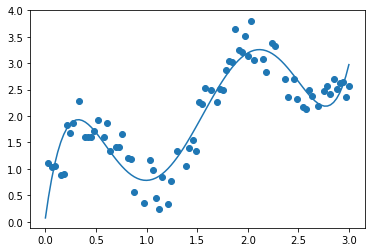

In [7]:
pol_exp = PolynomialFeatures(degree=5)

model = LinearRegression()
model.fit(pol_exp.fit_transform(X_train), y_train)
print('The R2 score of this model on the train set is:', model.score(pol_exp.fit_transform(X_train), y_train))

plt.scatter(X_train, y_train)
x = np.linspace(0, 3, 100).reshape(-1,1)
plt.plot(x, model.predict(pol_exp.fit_transform(x))) #these are new x's? why?
plt.show()


In [8]:
test_score = model.score(pol_exp.fit_transform(X_test), y_test)
print('The R2 score of the model on the test set is:', round(test_score, 3))

The R2 score of the model on the test set is: 0.846


## 5.3.4 Task 2: Exercise on Polynomial Regression

In 'sprint.csv', you find the data mentioned in the slides. It contains two variables, age and time needed to sprint 100 meter. 
- Take a look at the data and make a scatter plot.
- Make a training and test dataset
- Perform a linear regression, modeling time using age. Calculate the MSE of both training and test set
- Perform a polynomial regression of degree 2, modeling time using age. Calculate the MSE of both training and test set
- Perform a polynomial regression of degree 5, modeling time using age. Calculate the MSE of both training and test set
- Perform a polynomial regression of degree 25, modeling time using age. Calculate the MSE of both training and test set

Which of the four is the best model?

## 5.3.5 Solution

In [9]:
sprint_df = pd.read_csv('data/sprint.csv', index_col=0)

In [10]:
sprint_df.sample()

,sprint,age
46,11.876982,28.573282


In [11]:
x = sprint_df.age.values

In [12]:
x.shape

(250,)

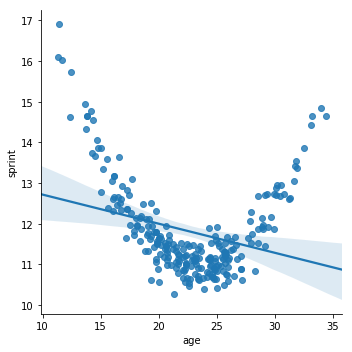

In [13]:
sns.lmplot('age', 'sprint', data=sprint_df)

In [14]:
sprint_mx = sprint_df.values.transpose()

In [15]:
sprint_mx

array([[10.68333547, 11.45407995, 11.32991238, 10.89694965, 10.9068807 ,
        14.66079705, 10.85512926, 11.09937094, 10.97367792, 11.71202038,
        11.43670755, 12.94642629, 10.91995798, 10.78487713, 12.4776814 ,
        11.04680536, 12.13213175, 11.53019045, 10.89295206, 10.71650561,
        10.83592979, 11.51515195, 11.95292153, 12.78313417, 13.85633591,
        12.87347295, 11.51042583, 10.8930766 , 10.63254007, 11.37568535,
        10.50320695, 13.3799048 , 12.60126069, 12.72454378, 11.24715597,
        11.12870343, 11.37040549, 13.66525921, 12.72901853, 11.36888722,
        11.20190904, 16.09567501, 12.37314033, 11.35633724, 10.74490779,
        11.8769823 , 12.39821526, 10.75259518, 10.69995437, 13.18174395,
        11.78768847, 12.72081135, 10.87688625, 11.45754669, 11.71442593,
        10.99994571, 11.52327221, 11.25371907, 13.05120987, 16.91959142,
        10.64785729, 13.04728853, 11.5263136 , 12.70544165, 12.50606651,
        14.32289443, 10.92942235, 11.45663556, 11.8

In [16]:
Y = sprint_mx[0].reshape(-1,1)
X = sprint_mx[1].reshape(-1,1)

In [17]:
print(Y.shape)
print(X.shape)

(250, 1)
(250, 1)


In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=123)

In [19]:
# Create polynomial expanders
pol_exp_2 = PolynomialFeatures(degree=2)
pol_exp_5 = PolynomialFeatures(degree=5)
pol_exp_25 = PolynomialFeatures(degree=25)

In [20]:
# Create regression 'estimator' objects
lr_1 = LinearRegression()
lr_2 = LinearRegression()
lr_5 = LinearRegression()
lr_25 = LinearRegression()

In [21]:
X_train.shape

(187, 1)

In [22]:
Y_test.shape

(63, 1)

In [23]:
# Fit the models
lr_1.fit(X_train, Y_train)
lr_2.fit(pol_exp_2.fit_transform(X_train), Y_train)
lr_5.fit(pol_exp_5.fit_transform(X_train), Y_train)
lr_25.fit(pol_exp_25.fit_transform(X_train), Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [24]:
# make predictions
y_pred_1 = lr_1.predict(X_test)
y_pred_2 = lr_2.predict(pol_exp_2.fit_transform(X_test))
y_pred_5 = lr_5.predict(pol_exp_5.fit_transform(X_test))
y_pred_25 = lr_25.predict(pol_exp_25.fit_transform(X_test))

In [25]:
# Calculate performance metrics
mse_1 = mean_squared_error(Y_test, y_pred_1)
mse_2 = mean_squared_error(Y_test, y_pred_2)
mse_5 = mean_squared_error(Y_test, y_pred_5)
mse_25 = mean_squared_error(Y_test, y_pred_25)
mae_1 = mean_absolute_error(Y_test, y_pred_1)
mae_2 = mean_absolute_error(Y_test, y_pred_2)
mae_5 = mean_absolute_error(Y_test, y_pred_5)
mae_25 = mean_absolute_error(Y_test, y_pred_25)

In [26]:
print("Regression 1 | MSE:\t" + str(round(mse_1, 3)) + "\t| MAE:\t" + str(round(mae_1, 3)))
print("Regression 2 | MSE:\t" + str(round(mse_2, 3)) + "\t| MAE:\t" + str(round(mae_2, 3)))
print("Regression 5 | MSE:\t" + str(round(mse_5, 3)) + "\t| MAE:\t" + str(round(mae_5, 3)))
print("Regression 20 | MSE:\t" + str(round(mse_25, 3)) + "\t| MAE:\t" + str(round(mae_25, 3)))

Regression 1 | MSE:	0.921	| MAE:	0.772
Regression 2 | MSE:	0.147	| MAE:	0.288
Regression 5 | MSE:	0.15	| MAE:	0.29
Regression 20 | MSE:	0.518	| MAE:	0.54


** Lets look at the plots as well **

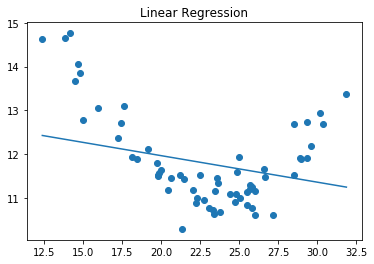

In [27]:
plt.scatter(X_test, Y_test)
x = np.linspace(X_test.min(), X_test.max(), 100).reshape(-1,1)
plt.plot(x, lr_1.predict(x)) # this creates the line representing the model
plt.title("Linear Regression")
plt.show()

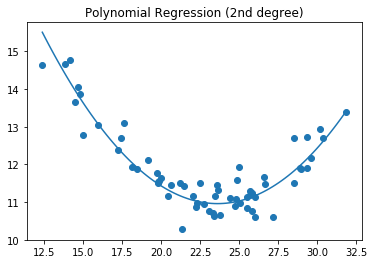

In [28]:
plt.scatter(X_test, Y_test)
x = np.linspace(X_test.min(), X_test.max(), 100).reshape(-1,1)
plt.plot(x, lr_2.predict(pol_exp_2.fit_transform(x))) # this creates the line representing the model
plt.title("Polynomial Regression (2nd degree)")
plt.show()

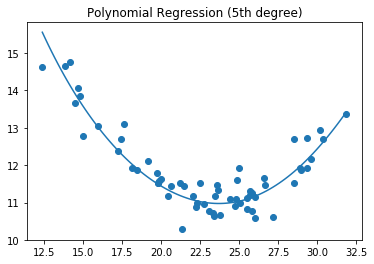

In [29]:
plt.scatter(X_test, Y_test)
x = np.linspace(X_test.min(), X_test.max(), 100).reshape(-1,1)
plt.plot(x, lr_5.predict(pol_exp_5.fit_transform(x))) # this creates the line representing the model
plt.title("Polynomial Regression (5th degree)")
plt.show()

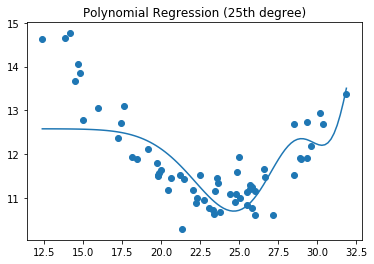

In [30]:
plt.scatter(X_test, Y_test)
x = np.linspace(X_test.min(), X_test.max(), 100).reshape(-1,1)
plt.plot(x, lr_25.predict(pol_exp_25.fit_transform(x))) # this creates the line representing the model
plt.title("Polynomial Regression (25th degree)")
plt.show()

### A more full-on look at the performance of this model

In [31]:
def test_poly_range(degree_min = 2, degree_max = 10):
    train_results = [] 
    test_results = []
    for d in range(degree_min, degree_max):
        pe = PolynomialFeatures(degree=d)
        lr = LinearRegression()
        lr.fit(pe.fit_transform(X_train), Y_train)
        train_results.append(mean_squared_error(Y_train, lr.predict(pe.fit_transform(X_train))))
        test_results.append(mean_squared_error(Y_test, lr.predict(pe.fit_transform(X_test))))
        
    result_dct = {}
    result_dct['degree'] = range(degree_min, degree_max)
    result_dct['training_MSE'] = train_results
    result_dct['testing_MSE'] = test_results
    results_df = pd.DataFrame(result_dct)
    
    return results_df

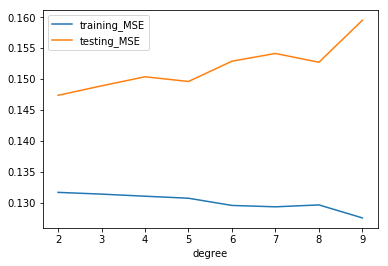

In [32]:
df = test_poly_range()
df.plot(x='degree',y=['training_MSE', 'testing_MSE'])

The plot above shows the analysis for various degrees of the polynomial regression. This plot leads us to believe that a third or seventh order polynomial regression performs best, and that adding orders beyond that point no longer leads to a noticible improvement of the algorithm. 

In [ ]:
df = test_poly_range(degree_min = 1, degree_max = 51)
df.plot(x='degree',y=['training_MSE', 'testing_MSE'])


This extreme example illustrates the unpredictable behavior that can occur when tuning parameters outside of their relevant range / using models that are overly complex for the data that they intend to predict. 